In [ ]:
import matplotlib.pyplot as plt 

def plot_overview(b_slices, b_norm=2500):
    for i in range(b_slices.shape[2]):
        fig, axs = plt.subplots(1, 3, figsize=(12, 4))
        axs[0].imshow(b_slices[..., i, 0].transpose(), vmin=-b_norm, vmax=b_norm, cmap='gray', origin='lower')
        axs[0].set_title('Bx')
        axs[1].imshow(b_slices[..., i, 1].transpose(), vmin=-b_norm, vmax=b_norm, cmap='gray', origin='lower')
        axs[1].set_title('By')
        axs[2].imshow(b_slices[..., i, 2].transpose(), vmin=-b_norm, vmax=b_norm, cmap='gray', origin='lower')
        axs[2].set_title('Bz')
        plt.show()

In [ ]:
import numpy as np
from sunpy.map import Map

data_path = [
    "/mnt/obsdata/nf2/sdo_AR/NOAA12673_HARP7115/hmi/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Bp.fits",
    "/mnt/obsdata/nf2/sdo_AR/NOAA12673_HARP7115/hmi/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Bp_err.fits",
    "/mnt/obsdata/nf2/sdo_AR/NOAA12673_HARP7115/hmi/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Bt.fits",
    "/mnt/obsdata/nf2/sdo_AR/NOAA12673_HARP7115/hmi/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Bt_err.fits",
    "/mnt/obsdata/nf2/sdo_AR/NOAA12673_HARP7115/hmi/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Br.fits",
    "/mnt/obsdata/nf2/sdo_AR/NOAA12673_HARP7115/hmi/hmi.sharp_cea_720s.7115.20170906_083600_TAI.Br_err.fits"
]


hmi_p, err_p, hmi_t, err_t, hmi_r, err_r = data_path 

p_map, t_map, r_map = Map(hmi_p), Map(hmi_t), Map(hmi_r)
p_error_map, t_error_map, r_error_map = Map(err_p), Map(err_t), Map(err_r)

maps = [p_map, t_map, r_map, p_error_map, t_error_map, r_error_map]

hmi_data = np.stack([maps[0].data, -maps[1].data, maps[2].data]).transpose()
error_data = np.stack([maps[3].data, maps[4].data, maps[5].data]).transpose()

b_slices = hmi_data[:, :, None]
error_slices = error_data[:, :, None]

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html forthe FITS unit standards. [sunpy.map.mapbase]


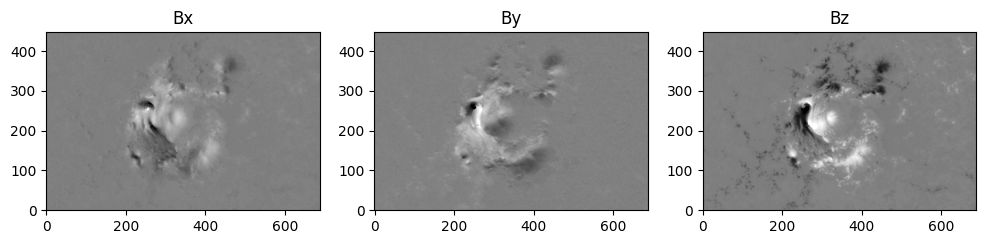

(688, 448, 1, 3)

In [ ]:
plot_overview(b_slices, b_norm=2500)
b_slices.shape

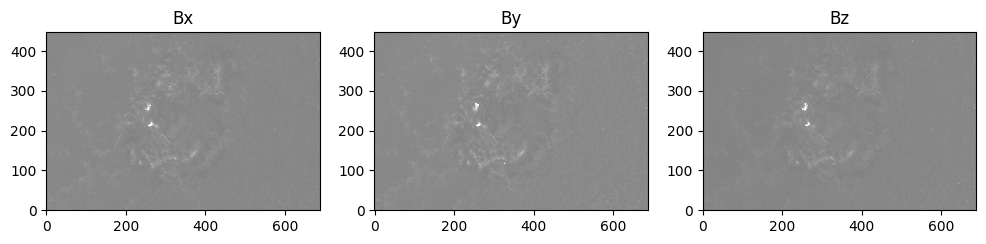

(688, 448, 1, 3)

In [ ]:
plot_overview(error_slices, b_norm=500)
error_slices.shape

In [ ]:
b_slices[250, 250, 0, 2], error_slices[250, 250, 0, 2]

(-2436.5, 107.59700000000001)

In [ ]:
(0.03/360) * 2*np.pi*700

0.36651914291880916

In [ ]:
np.deg2rad(0.03) * 700

0.36651914291880916

In [ ]:
type(p_map.meta)

sunpy.util.metadata.MetaDict

In [ ]:
import astropy.units as u

In [ ]:
p_map.meta['cdelt1'], p_map.meta['keycomments']['CDELT1']

(0.0299999993, '[degree] Map scale in X direction')

In [ ]:
cdelt1 = p_map.meta['cdelt1'] * u.deg 
cdelt1

<Quantity 0.03 deg>

In [ ]:
cdelt1.to('rad')

<Quantity 0.0005236 rad>

In [ ]:
p_map.meta['rsun_ref'], p_map.meta['keycomments']['RSUN_REF']

(696000000.0, '[m] Reference radius of the Sun: 696,000,000.0')

In [ ]:
rsun_ref = p_map.meta['rsun_ref'] * u.m 
rsun_ref

<Quantity 6.96e+08 m>

In [ ]:
# length of a pixel
d = cdelt1.to('rad').value * rsun_ref.to('m')
d

<Quantity 364424.73931317 m>

In [ ]:
d.to('Mm')

<Quantity 0.36442474 Mm>

In [ ]:
Mm_per_pixel = d.to('Mm') / u.pix
Mm_per_pixel

<Quantity 0.36442474 Mm / pix>

In [ ]:
Nx, Ny, _, _ = b_slices.shape 
Nx, Ny

(688, 448)

In [ ]:
Lx = (Nx - 1) * u.pix 
Ly = (Ny - 1) * u.pix 

Lx, Ly

(<Quantity 687. pix>, <Quantity 447. pix>)

In [ ]:
Lx*Mm_per_pixel, Ly*Mm_per_pixel

(<Quantity 250.35979591 Mm>, <Quantity 162.89785847 Mm>)

In [ ]:
Mm_per_pixel = 0.36 * u.Mm / u.pix 
Mm_per_pixel

<Quantity 0.36 Mm / pix>

In [ ]:
Lx*Mm_per_pixel, Ly*Mm_per_pixel

(<Quantity 247.32 Mm>, <Quantity 160.92 Mm>)